# Projeto 1 - Ciência dos Dados

Nome: Lucca Nazari da Silva e Souza

## Pergunta (s) a ser respondida

Como os países que pertenciam a URSS foram afetados pelo fim da URSS e formação da CEI? 

## Explicação da hipótese e mecanismo

A URSS (União das Repúblicas Socialistas Soviéticas) era uma federação de várias repúblicas lideradas pela Rússia. Criada em 1922, pelos líderes da Revolução Bolchevique, na Rússia. O modelo econômico e político adotado foi o socialismo/comunismo.
Dessa forma, práticas como a forte intervenção estatal na economia, existência de partido único e 'equality of outcome', algo como igualdade de resultados/bens.

Com base nos apontamentos do modelo, é plausível supor que após o fim da URSS e a volta da liberdade econômica aos países do bloco, a economia e outros setores sociais voltem a apresentar desenvolvimento.

O mecanismo para o desenvolvimento do projeto será feito de forma que indicadores sociais que resumem o comportamento do país serão analisados em comparação com os anos em que os países estavam na URSS com os anos em que saíram da federação e se uniram na CEI (Comunidade dos Estados Independentes).

In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

## Bases de dados usadas

	http://www.worldbank.org/
    http://data.worldbank.org/indicator/NY.GDP.PCAP.KD
    http://hdr.undp.org/en/
    http://www.ilo.org/global/lang--en/index.htm
    

## Análise de dados

Inicialmente, é necessário importar os dados que servirão de base para a análise em questão.
Foram selecionadas os índices de 'IDH' e 'Income', pois fornecem um panorama geral da condição econômica do país, que satisfaz a condição inicial para responder a hipótese levantada.

In [97]:
idh= pd.read_excel('hdi_human_development_index.xlsx')
income= pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')

In [98]:
idh= idh.set_index('country')
income= income.set_index('country')

A seguir, será feito o join dos arquivos com os índices, de forma que facilitará o uso dos dados.

In [99]:
data= idh.join(income,how='inner', lsuffix= '_idh', rsuffix='_income')
data.head()

,1990_idh,1991_idh,1992_idh,1993_idh,1994_idh,1995_idh,1996_idh,1997_idh,1998_idh,1999_idh,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


Agora, serão definidas variáveis com as partes de interesse da 'data' em que foi feito o join. 


In [100]:
idh= data.loc[:,['1990_idh','2015_idh']]

In [101]:
idh_urss = idh.loc[('Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyz Republic', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'),['1990_idh','2015_idh']]

In [103]:
idh_eu= idh.loc[('Belgium','Bulgaria','Croatia','Czech Republic','Denmark','France','Germany','Greece','Luxembourg','Poland','Portugal','Spain','Switzerland','United Kingdom'),:]

In [104]:
income= data.loc[:,['1990_income','2015_income']]

In [105]:
income_urss= income.loc[('Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyz Republic', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'),:]

In [106]:
income_eu= income.loc[('Belgium','Bulgaria','Croatia','Czech Republic','Denmark','France','Germany','Greece','Luxembourg','Poland','Portugal','Spain','Switzerland','United Kingdom'),:]

Em relação aos anos, as variáveis esolhidas agrupam os dados dos anos de 1990 e 2015, ou seja ano anterior do fim da URSS (1991) e os dados mais recentes disponíveis, para mostrar o desenvolvimento das econonomias nesse intervalo de tempo. 

Assim, as variáveis definidas unem uma permutação dos anos citados com os índices ('IDH' e Income) para o grupo dos países da ex-URSS e para os membros da UE (União Europeia).


O Income refere-se à um índice que mede a renda per capita do país, logo, fornece um indicador geral do desenvolvimento econômico do país.

O IDH (Índice de Desenvolvimento Humano) refere-se à um índice que toma como base o tripé dos indicadores de PIB per capita, Grau de Escolaridade e Expectativa de Vida. Portanto, o IDH consegue agregar à seu valor, o desenvolvimento social, que não está diretamente explícito no Income.



In [107]:
idh_urss['1990_idh'].mean()

0.6566666666666666

In [108]:
idh_urss['2015_idh'].mean()

0.7279

In [109]:
idh_eu['1990_idh'].mean()

0.76

In [110]:
idh_eu['2015_idh'].mean()

0.8812857142857143

In [168]:
income_urss['1990_income'].mean()

7928.0

In [112]:
income_urss['2015_income'].mean()

12101.0

In [113]:
income_eu['1990_income'].mean()

27128.571428571428

In [114]:
income_eu['2015_income'].mean()

38228.57142857143

In [115]:
income_eu['2015_income'].median()

35000.0

O bloco da União Europeia foi escolhido para ser analisado, pois serve como uma boa base de referência para comparar o desenvolvimento dos dados dos atuais membros da CEI, visto que a União Europeia é, para muitos, um exemplo muito positivo de desenvolvimento social e econômico que é evidente em seus índices.

Para realizar tal comparação é possível estabelecer uma relação de crescimento relativo para cada 'bloco' entre os anos destacados no estudo (1990-2015). O resultado é uma porcentagem de crescimento de cada bloco em relação ao período descrito.

In [116]:
cr_urss_idh= idh_urss['1990_idh'].mean()/ idh_urss['2015_idh'].mean()
1-cr_urss_idh 

0.09786142785181118

In [117]:
cr_eu_idh= idh_eu['1990_idh'].mean()/idh_eu['2015_idh'].mean()
1- cr_eu_idh

0.1376236018803696

In [118]:
cr_urss_income = income_urss['1990_income'].mean()/income_urss['2015_income'].mean()
1-cr_urss_income

0.3448475332617139

In [119]:
cr_eu_income= income_eu['1990_income'].mean()/income_eu['2015_income'].mean()
1-cr_eu_income

0.29035874439461884

No entanto, ao comparar o PIB per capita dos ex membros da URSS com os membros da UE, é evidente um crescimento proporicionalmente maior dos primeiros. Isso porque, o crescimento efetivo do PIB, em relação a população, foi maior nos ex-membros da URSS do que na UE. 

É certo que Grau de Escolaridade e Expectativa de Vida (indicadores presentes no IDH) são indicadores que demoram mais tempo para serem significativamente alterados, pois as os investimentos na educação e na saúde trazem grandes benefícios a longo prazo.

É evidente que o IDH da Europa cresceu mais que dos países saídos da URSS, pois as condições econômicas dos membros da UE, de maneira geral, eram muito melhores que os ex-membros da URSS logo, é condizente que tenha melhor IDH.
Para tanto, é necessário analisar o indicador de Renda per capita isoladamente, pois nos dá uma melhor ideia do crescimento do país e sua consequente melhora indireta para a população.



Text(0, 0.5, 'IDH')

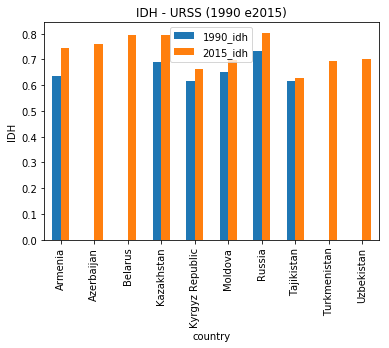

In [265]:
idh_urss.plot(kind='bar', title='IDH - URSS (1990 e 2015)')
plt.ylabel('IDH')

O gráfico acima apresenta o IDH dos ex-membros da URSS nos anos de 1990 (azul) e em 2015 (laranja). É evidente uma grande melhora nesse índice.

Text(0, 0.5, 'Income (US$)')

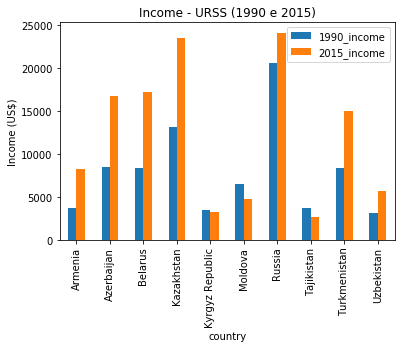

In [268]:
income_urss.plot(kind='bar', title='Income - URSS (1990 e 2015)')
plt.ylabel('Income (US$)')

Gráfico do Income dos países da atual CEI nos anos de 1990 e 2015.

In [125]:
anos_income_urss= data.iloc[:,216:241]
anos_income_urss= anos_income_urss.loc[('Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyz Republic', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'),:]
anos_income_urss

,1990_income,1991_income,1992_income,1993_income,1994_income,1995_income,1996_income,1997_income,1998_income,1999_income,...,2005_income,2006_income,2007_income,2008_income,2009_income,2010_income,2011_income,2012_income,2013_income,2014_income
country,,,,,,,,,,,,,,,,,,,,,
Armenia,3740,3340,1980,1850,1990,2170,2340,2440,2640,2740,...,5360,6110,7010,7560,6530,6700,7020,7510,7730,7970
Azerbaijan,8510,8320,6350,4810,3810,3320,3330,3490,3800,4050,...,8050,10700,13200,14400,15400,16000,15800,15900,16600,16700
Belarus,8350,8250,7440,6860,6070,5450,5620,6290,6850,7120,...,11200,12400,13500,15000,15000,16200,17200,17500,17700,17900
Kazakhstan,13100,11500,10900,10000,8870,8280,8450,8730,8720,9040,...,16000,17500,18900,19300,19000,20100,21300,22000,23000,23600
Kyrgyz Republic,3480,3150,2680,2270,1810,1700,1790,1940,1950,1990,...,2370,2420,2600,2790,2840,2790,2920,2870,3120,3180
Moldova,6460,5420,3840,3800,2630,2610,2460,2510,2340,2270,...,3310,3480,3590,3880,3650,3910,4180,4150,4540,4760
Russia,20600,19600,16700,15300,13400,12800,12400,12600,11900,12700,...,19300,21000,22800,24000,22100,23100,24100,24900,25100,24900
Tajikistan,3650,3310,2310,1900,1470,1270,1040,1050,1090,1110,...,1710,1790,1890,1990,2020,2110,2210,2320,2440,2550
Turkmenistan,8320,7710,6370,6290,5070,4600,4820,4200,4440,5110,...,6500,7130,7820,8850,9250,9940,11200,12200,13200,14300


In [126]:
anos_idh_urss= data.iloc[:,1:26]
anos_idh_urss= anos_idh_urss.loc[('Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyz Republic', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'),:]
anos_idh_urss

,1991_idh,1992_idh,1993_idh,1994_idh,1995_idh,1996_idh,1997_idh,1998_idh,1999_idh,2000_idh,...,2006_idh,2007_idh,2008_idh,2009_idh,2010_idh,2011_idh,2012_idh,2013_idh,2014_idh,2015_idh
country,,,,,,,,,,,,,,,,,,,,,
Armenia,0.628,0.595,0.593,0.597,0.603,0.609,0.618,0.632,0.639,0.644,...,0.707,0.721,0.725,0.720,0.729,0.732,0.736,0.739,0.741,0.743
Azerbaijan,NaN,NaN,NaN,NaN,0.609,0.610,0.615,0.626,0.636,0.642,...,0.708,0.719,0.728,0.737,0.741,0.742,0.745,0.752,0.758,0.759
Belarus,NaN,NaN,NaN,NaN,0.655,0.659,0.666,0.670,0.675,0.681,...,0.739,0.755,0.771,0.780,0.787,0.793,0.796,0.796,0.798,0.796
Kazakhstan,0.684,0.682,0.676,0.668,0.665,0.666,0.670,0.672,0.676,0.685,...,0.754,0.758,0.758,0.763,0.766,0.774,0.782,0.789,0.793,0.794
Kyrgyz Republic,0.609,0.599,0.586,0.568,0.562,0.567,0.576,0.580,0.586,0.593,...,0.618,0.624,0.629,0.631,0.632,0.638,0.647,0.656,0.662,0.664
Moldova,0.641,0.621,0.619,0.596,0.594,0.591,0.593,0.593,0.595,0.597,...,0.656,0.661,0.668,0.664,0.672,0.679,0.686,0.696,0.701,0.699
Russia,0.729,0.718,0.710,0.701,0.700,0.701,0.704,0.703,0.709,0.720,...,0.761,0.769,0.776,0.773,0.785,0.792,0.799,0.803,0.805,0.804
Tajikistan,0.611,0.589,0.571,0.549,0.539,0.522,0.526,0.528,0.529,0.535,...,0.586,0.592,0.601,0.603,0.608,0.613,0.617,0.622,0.625,0.627
Turkmenistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.665,0.672,0.678,0.683,0.688,0.692


Gráficos de scatter referentes à URSS com os eixos de idh (x) e income (y).

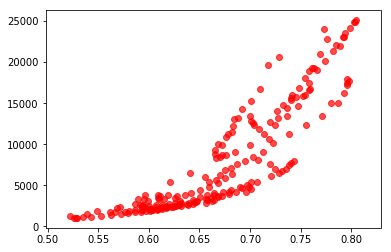

In [288]:
plt.scatter(anos_idh_urss,anos_income_urss, c='red', alpha=0.7)

Por fim, é possível graficar os dados levantados em histogramas que facilitam a compreensão dos resultados.

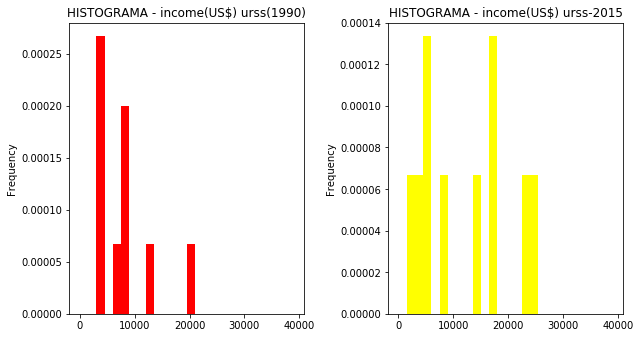

In [296]:
faixa = range(10,40000,1500)

fig = plt.figure(figsize=(9, 9))
plt.subplot(221)

income_urss['1990_income'].plot.hist(bins=faixa,title='HISTOGRAMA - income(US$) urss(1990)', density=True, color=('red'))


plt.subplot(222)
income_urss['2015_income'].plot.hist(bins=faixa,title='HISTOGRAMA - income(US$) urss-2015', density=True, color=('yellow'))

plt.tight_layout()
plt.show()

O histograma da esquerda apresenta o income dos ex-membros da URSS em 1990, e na direita, em 2015.

Como é evidente, o gráfico da direita possui as barras um pouco deslocadas para a direita (indicando crescimento econômico quando comparado com o ano anterior).

Para facilitar a vizualização, um histograma que une os dois dados foi disponibilizado abaixo, confirmando a afirmação acima. 

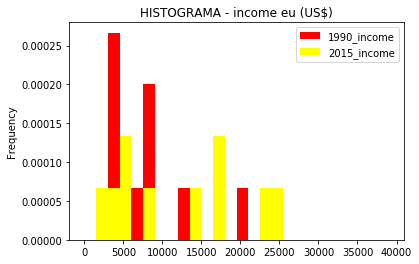

In [293]:
faixa = range(10,40000,1500)

income_urss.plot.hist(bins=faixa,title='HISTOGRAMA - income eu (US$)', density=True, color=('red','yellow'))

A seguir, o mesmo procedimento será realizado com o indicador de IDH.

Os histogramas apresentados, conferem maior facilidade para vizualisar o comportamento do Income e do IDH em cada um dos casos, para os ex-membros da URSS.
A seguir, a união dos dois histogramas para facilitar a comparação dos resultados.

## Conclusão

Com base no apresentado, é possível concluir que a hipótese inicialmente feita estava correta. De fato, o fim da URSS foi positiva do ponto de vista econômico e social para os países que eram membros.
Não só a saída trouxe crescimento econômico e melhora nos indicadores sociais (IDH), como também trouxe competitividade para a CEI no cenário internacional, visto que cresceu mais em renda per capita do que países referência em desenvolvimento para todo o mundo, 6% mais do que a União Europeia, percentualmente.
Dessa forma, o protecionismo econômico que era pregado pela URSS provou certa inferioridade de desenvolvimento quando comparada com a relativa liberalização econômica que teve início com o fim da URSS. Como citado anteriormente, o crescimento econômico é o principal fator para o desenvolvimento, também, dos outros setores sociais, pois a confiança do mercado nos países retorna e com isso, aumentam os investimentos que, consequentemente, melhoram a condição de vida da população.
O ano seguinte da queda do Muro de Berlim e o ano anterior ao fim da URSS, 1990, apresentavam indicadores muito piores do que os de 2015. 
Com o processo de liberalização da economia, a renda per capita no período de 25 anos, aumentou em 34%, enquanto o IDH cresceu aproximadamente 10%. Com o retorno dos investimentos, como citado anteriormente, os outros indicadores sociais, como o IDH tendem a acompanhar, ou até mesmo ultrapassar, o crescimento do IDH de países de referência, como os membros da UE, que no mesmo período de 25 anos (1990-2015), tiveram um aumento de 14%. 